In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nsims=1000

In [40]:
np.random.seed(0) 
# disk mass
mu_md, sigma_md = -2.05, 0.85 # mean and standard deviation
s_md = np.random.lognormal(mu_md, sigma_md, nsims)

# characteristic radius
mu_rc, sigma_rc = 3.8, 0.18 # mean and standard deviation
s_rc = np.random.lognormal(mu_rc, sigma_rc, nsims)

# stellar mass
s_ms_log = np.random.uniform(np.log10(0.01),np.log10(2),nsims)
s_ms=10**s_ms_log

# tau gas
s_tg_log = np.random.uniform(6,7,nsims)
s_tg=10**s_tg_log

# metallicity
mu_mt, sigma_mt = -0.02, 0.22 # mean and standard deviation
s_mt = np.random.normal(mu_mt, sigma_mt, nsims)

In [41]:
gamma=1

In [42]:
amin=s_rc*((7./4.-gamma)/(2.-gamma))**(1./(2.-gamma))
sigmag=(2.-gamma)*s_md*2.e33/(2.*np.pi*(s_rc*1.5e13)**2.)
q=1.24e5*(amin**(gamma-7./4.))*(s_rc**(-gamma))*(s_ms)*np.exp((amin/s_rc)**(2.-gamma))/sigmag

In [45]:
filterq=q>1

In [46]:
filtermd=(s_md/s_ms)<0.2

In [48]:
filter=filterq&filtermd

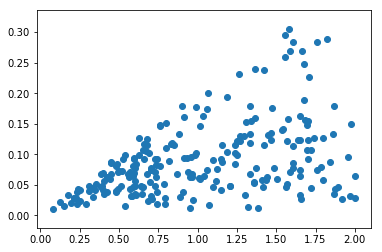

In [49]:
plt.scatter(s_ms[filter],s_md[filter])

In [50]:
data=np.vstack((s_md,s_rc,s_ms,s_mt,s_tg)).T[filter]

In [54]:
df=pd.DataFrame(data=data,columns=["md","ac","ms","metal","tgas"])

In [62]:
df['gama']=1
df['cmigI']=0.1
df['Apert']=0 
df['Fpert']=1
df['Tfin']=2.1e7
df['Verb']=False

In [65]:
df.to_csv("parameters_ep.in") # estrellas pequeñas